# SALARY PREDICTIONS

Given a dataset which captures gross salary from july 2013 through june 2014 and include only those employes who were employed 
on june 14.Predict salaries for employes in blatimore. 

## OUTLINE

1. Import Dataset
2. Data Cleaning and Data preparation
3. Exploratory Data Analysis
4. Feature Engineering
5. Train Test Split
6. Model Building 
7. Model Evaluation

In [1]:
#Import libraries for analysis
import pandas as pd
import numpy as np
#Import libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
#Import libraries for train-test-split
from sklearn.model_selection import train_test_split
#Import libraries for scaling 
from sklearn.preprocessing import StandardScaler
#Import libraries for model building
from sklearn.linear_model import LinearRegression

In [2]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

The dataset is in csv format and can be imported using read_csv method available in pandas library.

In [3]:
salary=pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Data Science\trainfile.csv')

In [4]:
salary

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95
...,...,...,...,...,...,...,...
18976,"Zotamou,Jean Marie D",AIDE BLUE CHIP,W02235,Youth Summer,05/21/2014,$11310.00,NaN
18977,"Zotamou,Pivot D",AIDE BLUE CHIP,W02629,Youth Summer,05/21/2014,$11310.00,NaN
18978,"Zovistoski,Zachary D",POLICE OFFICER TRAINEE,A99416,Police Department,12/17/2013,$43999.00,$21070.03
18979,"Zubyk,Stanislav T",POLICE OFFICER,A99262,Police Department,01/23/2013,$44104.00,$48608.12


In [5]:
#Data cleaning and preparation

In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


There are 18981 rows in dataset 
There are 7 columns in the dataset

In [7]:
#copy of dataset
salary_cpy=salary.copy()

In [8]:
salary_cpy.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [9]:
#since name has leading space so we are removing it 
salary_cpy.columns = salary_cpy.columns.str.strip()

In [10]:
salary_cpy.columns

Index(['Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

In [11]:
#Checking null values 
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [12]:
salary_cpy=salary_cpy.dropna(subset=['HireDate'])
salary_cpy.isnull().sum()

Name               0
JobTitle           0
AgencyID           0
Agency             0
HireDate           0
AnnualSalary       0
GrossPay        3223
dtype: int64

In [13]:
#lets drop gross pay column
salary_cpy=salary_cpy.drop('GrossPay',axis=1)

In [14]:
salary_cpy.isnull().sum()

Name            0
JobTitle        0
AgencyID        0
Agency          0
HireDate        0
AnnualSalary    0
dtype: int64

In [15]:
salary_cpy.AgencyID.value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
A65MIL      1
W02511      1
W02656      1
W02689      1
W02676      1
Name: AgencyID, Length: 1177, dtype: int64

There are 1177 agencies in blatimore.As per general understanding AgencyID represents agency,
as we should have the same number of agencies as well.But after validating it seems one agency is having multiple agency IDs.

In [16]:
#Value counts for agency
salary_cpy.Agency.value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
HLTH-Health Dept Locatio       6
Council Services               6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: Agency, Length: 65, dtype: int64

In [17]:
salary_cpy.JobTitle.value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
APPRENTICESHIP PROGRAM ADMINIS       1
PLANNER 4                            1
PROGRAM MANAGER IV SHERIFF           1
STATE'S ATTORNEY                     1
ASSISTANT CHIEF COURT SECURITY       1
Name: JobTitle, Length: 1073, dtype: int64

In [18]:
#Value counts on HireDate
salary_cpy.HireDate.value_counts()

05/21/2014    1478
06/10/2013     696
06/12/2012     541
06/07/2011     368
05/29/2014     347
              ... 
09/06/1995       1
11/17/1987       1
12/27/1999       1
06/01/1970       1
06/18/1971       1
Name: HireDate, Length: 4737, dtype: int64

In [19]:
#Removing dollars '$' from annual salary and converting it into float
salary_cpy['AnnualSalary']=salary_cpy['AnnualSalary'].apply(lambda x:(float)(str(x)[1:]))

In [20]:
salary_cpy.AnnualSalary.value_counts()

11310.0    4811
20800.0     325
29245.0     196
43999.0     169
44773.0     162
           ... 
26774.0       1
81120.0       1
44000.0       1
58041.0       1
83370.0       1
Name: AnnualSalary, Length: 1590, dtype: int64

In [21]:
salary_cpy['HireDay']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x)[3:5]))

In [22]:
salary_cpy['HireMonth']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x)[0:2]))

In [23]:
salary_cpy['HireYear']=salary_cpy['HireDate'].apply(lambda x:(int)(str(x)[6:]))

In [24]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


In [25]:
#Trimming all categorical columns to make sure there are no leading and training spaces and no double spaces between words
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x:str(x).strip().replace("  "," "))

In [26]:
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x:str(x).strip().replace("  "," "))

In [27]:
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x:str(x).strip().replace("  "," "))

In [28]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,43999.0,24,7,2013


It can be seen that some of the job title are in uppercase ,some with lower and with mix of both which might effect analysis,
so converting them to uppercase and also converting agency and agencyID.

In [29]:
salary_cpy['JobTitle']=salary_cpy['JobTitle'].apply(lambda x:str(x).upper())

In [30]:
salary_cpy['AgencyID']=salary_cpy['AgencyID'].apply(lambda x:str(x).upper())

In [31]:
salary_cpy['Agency']=salary_cpy['Agency'].apply(lambda x:str(x).upper())

In [32]:
salary_cpy.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,HireDay,HireMonth,HireYear
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,YOUTH SUMMER,06/10/2013,11310.0,10,6,2013
1,"Aaron,Patricia G",FACILITIES/OFFICE SERVICES II,A03031,OED-EMPLOYMENT DEV,10/24/1979,53428.0,24,10,1979
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,STATES ATTORNEYS OFFICE,09/25/2006,68300.0,25,9,2006
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-HEALTH DEPARTMENT,07/23/2009,62000.0,23,7,2009
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,POLICE DEPARTMENT,07/24/2013,43999.0,24,7,2013


In [33]:
#last thing left in data preparation is outlier treatment,sp lets create box plot for annual salary and check for outliers 
salary_cpy.shape

(18911, 9)

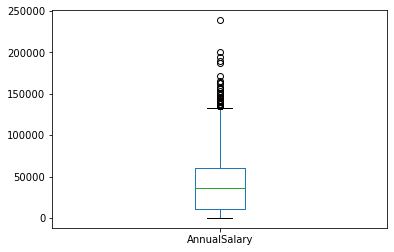

In [34]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

We can say there are few salaries which are way far from other salaries and they might effect the prediction,
so we have to eliminate them.

In [35]:
#summary stats of annual salary
salary_cpy.AnnualSalary.describe()

count     18911.000000
mean      39660.421889
std       25163.465942
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: AnnualSalary, dtype: float64

Delete rows whose annual salary>150000
according to box plot.

In [36]:
salary_cpy=salary_cpy[salary_cpy['AnnualSalary']<140000]

In [37]:
salary_cpy.shape

(18885, 9)

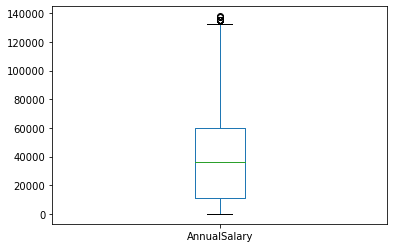

In [38]:
salary_cpy.AnnualSalary.plot.box()
plt.show()

Now we can say that we are done with data preparation we can move to next step that is exploratory data analysis.

We will first check the distribution of annual salary by creating the distplot

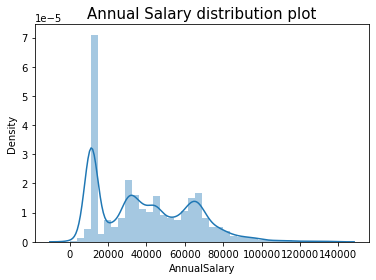

In [39]:
sns.distplot(salary_cpy.AnnualSalary)
plt.title("Annual Salary distribution plot",fontsize=15)
plt.show()

The data is distributed very randomly and there seems to be not many people with salary more than 100000

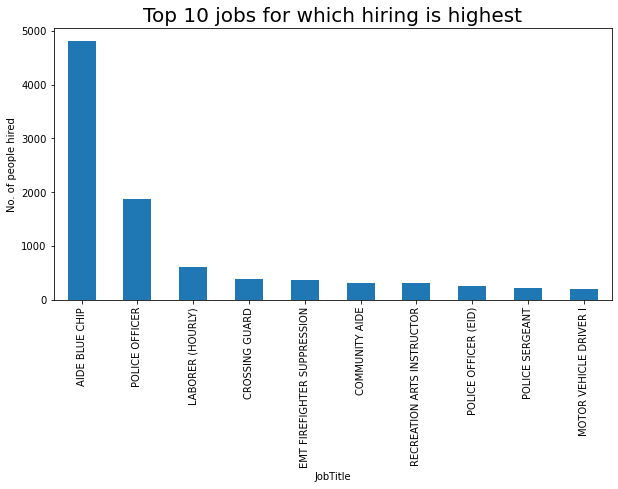

In [40]:
#Let us check jobs for which people are hired the most .For this we will be creating a barplot.
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('No. of people hired')
plt.title('Top 10 jobs for which hiring is highest',fontsize=20)
plt.show()

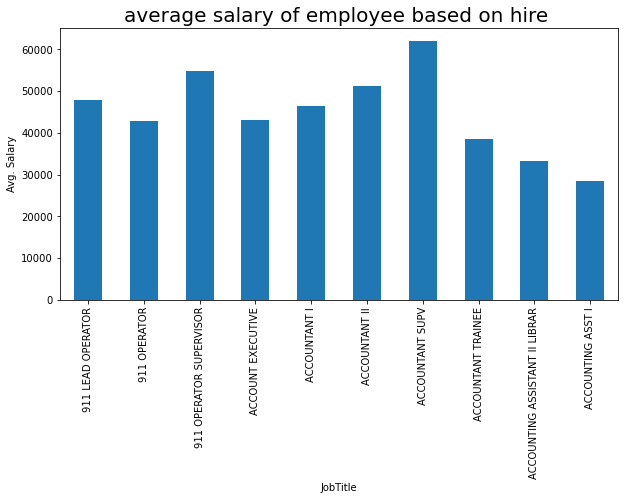

In [41]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().head(10).plot.bar()
plt.ylabel('Avg. Salary')
plt.title('average salary of employee based on hire ',fontsize=20)
plt.show()

In [42]:
#number of jobs that our paying more than total average salary
#Find mean salary
mean_sal=salary_cpy.AnnualSalary.mean()

In [43]:
mean_sal

39492.99858829759

In [44]:
#number of jobs paying more than mean salary
good_paying_jobs=salary_cpy.groupby(['JobTitle'])['AnnualSalary'].mean().reset_index()

In [45]:
good_paying_jobs[good_paying_jobs.AnnualSalary>mean_sal]['JobTitle'].count()

797

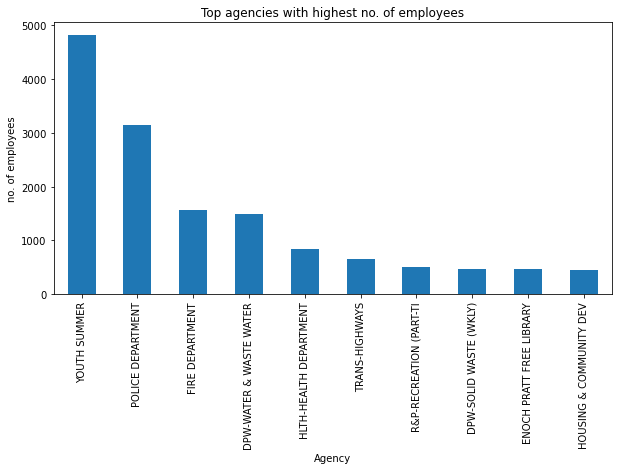

In [46]:
#Let us check the top 10 agencies and agencyID with the highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['Agency'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('no. of employees')
plt.title('Top agencies with highest no. of employees')
plt.show()

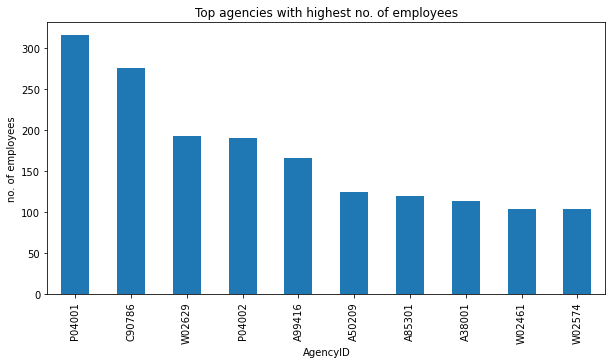

In [47]:
#Let us check the top 10 agencies and agencyID with the highest number of employees
plt.figure(figsize=(10,5))
salary_cpy.groupby(['AgencyID'])['Name'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('no. of employees')
plt.title('Top agencies with highest no. of employees')
plt.show()

Let us check people hired on which year have lowest salaries.This is to check if as the hire year
increases the salary decreases and increases.Because people have higher expirience salary should be high.

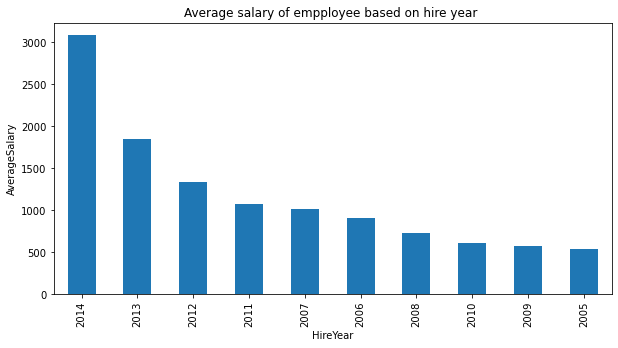

In [48]:
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireYear'])['AnnualSalary'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('AverageSalary')
plt.title('Average salary of empployee based on hire year ')
plt.show()

The trend above suggests that the salary of the employees increases with expirience in the company.
So,now lets calculate expirience in days with agency.  

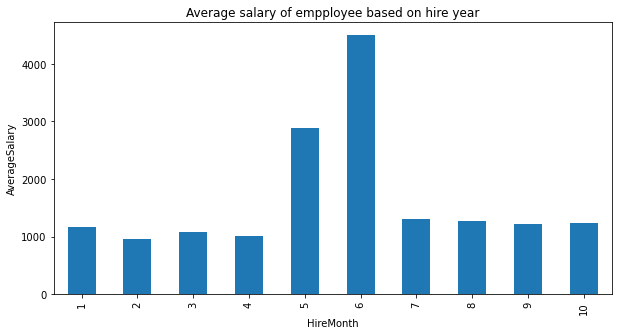

In [49]:
#check if month has any such effect
plt.figure(figsize=(10,5))
salary_cpy.groupby(['HireMonth'])['AnnualSalary'].count().head(10).plot.bar()
plt.ylabel('AverageSalary')
plt.title('Average salary of empployee based on hire year')
plt.show()

We can conclude more employees are hired on month of may and june but they have relatively lower average salary.

<Figure size 1080x1440 with 0 Axes>

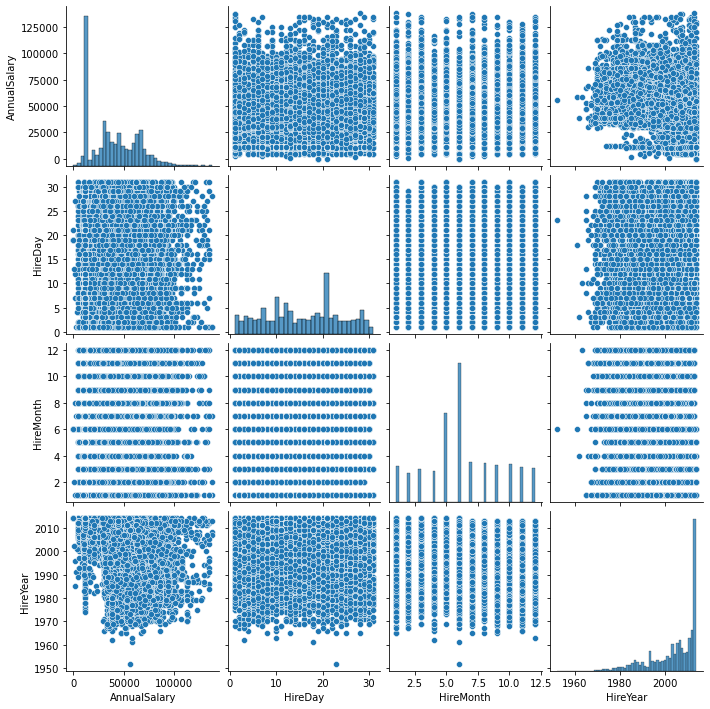

In [50]:
#Lets check if there is any relation between any of the numerical variable using pairplot.
plt.figure(figsize=(15,20))
sns.pairplot(salary_cpy)
plt.show()

<AxesSubplot:>

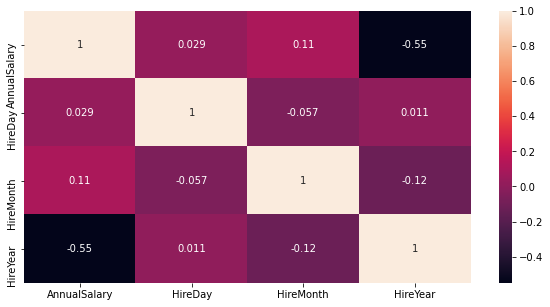

In [51]:
plt.figure(figsize=(10,5))
sns.heatmap(salary_cpy.corr(),annot=True)

## Feature Engineering 

In [52]:
#Create a copy of dataframe 
salary_master=salary_cpy.copy()

We are using mean encoding here as the number of labels of categorical variables are very high ,
and if we use any other method then that will create unnecessary variables or labelling might not be appropriate. 

In [53]:
#Apply mean encoding for job title
mean_job=salary_master.groupby('JobTitle')['AnnualSalary'].mean()
salary_master['JobTitle']=salary_master['JobTitle'].map(mean_job)
salary_master['JobTitle']

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: JobTitle, Length: 18885, dtype: float64

In [54]:
#Apply mean encoding for agency
mean_agency=salary_master.groupby('Agency')['AnnualSalary'].mean()
salary_master['Agency']=salary_master['Agency'].map(mean_agency)
salary_master['Agency']

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61481.005417
             ...     
18976    11313.967200
18977    11313.967200
18978    61481.005417
18979    61481.005417
18980    42565.513078
Name: Agency, Length: 18885, dtype: float64

In [55]:
#Apply mean encoding for agencyID
mean_agencyID=salary_master.groupby('AgencyID')['AnnualSalary'].mean()
salary_master['AgencyID']=salary_master['AgencyID'].map(mean_agencyID)
salary_master['AgencyID']

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: AgencyID, Length: 18885, dtype: float64

In [56]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18885 non-null  object 
 1   JobTitle      18885 non-null  float64
 2   AgencyID      18885 non-null  float64
 3   Agency        18885 non-null  float64
 4   HireDate      18885 non-null  object 
 5   AnnualSalary  18885 non-null  float64
 6   HireDay       18885 non-null  int64  
 7   HireMonth     18885 non-null  int64  
 8   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 1.4+ MB


In [57]:
salary_master=salary_master.drop(['HireDate','Name'],axis=1)

In [58]:
salary_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   JobTitle      18885 non-null  float64
 1   AgencyID      18885 non-null  float64
 2   Agency        18885 non-null  float64
 3   AnnualSalary  18885 non-null  float64
 4   HireDay       18885 non-null  int64  
 5   HireMonth     18885 non-null  int64  
 6   HireYear      18885 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.2 MB


## Train Test Splitting

In [59]:
#split data into train & test split
salary_train,salary_test=train=train_test_split(salary_master,train_size=0.7, random_state=10)
print(salary_train.shape)
print(salary_test.shape)

(13219, 7)
(5666, 7)


In [60]:
#divide train set into dependent & independent variables
y_train=salary_train.pop('AnnualSalary')
x_train=salary_train

In [61]:
#divide test set into dependent & independent 
y_test=salary_test.pop('AnnualSalary')
x_test=salary_test

## FEATURE SCALING

In [62]:
scaler=StandardScaler()
x_train[x_train.columns]=scaler.fit_transform(x_train[x_train.columns])
x_train

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
2110,-0.739384,-0.813601,-0.382481,1.220063,-1.143251,0.282241
7529,-1.162446,-1.272054,-1.345816,0.026686,-0.124696,0.955021
15366,-1.162446,-1.272054,-1.345816,-0.689340,-0.124696,0.858910
3237,-1.162446,-1.272054,-1.345816,-0.570003,-0.124696,0.474464
16659,-1.162446,-1.272054,-1.345816,0.384699,-0.124696,0.955021
...,...,...,...,...,...,...
9453,-1.162446,-1.272054,-1.345816,0.623375,-0.464215,0.955021
7371,-0.394744,-0.259730,-0.377713,-1.405367,-1.143251,-0.198316
17822,-0.222637,-0.056356,-0.382481,1.339401,-0.464215,-0.486650
7373,0.114649,1.044104,1.105307,-1.166691,1.233377,-3.369991


In [63]:
x_test[x_test.columns]=scaler.transform(x_test[x_test.columns])
x_test

,JobTitle,AgencyID,Agency,HireDay,HireMonth,HireYear
9797,0.870032,0.958554,1.048937,1.339401,0.554340,0.378353
4541,-1.162446,-1.272054,-1.345816,0.623375,-0.464215,0.955021
2860,-1.162446,-1.272054,-1.345816,1.458739,-0.124696,0.858910
8139,1.333601,1.373877,1.497597,0.265361,0.554340,0.378353
2876,0.033304,0.189903,0.022617,0.384699,0.214822,0.762798
...,...,...,...,...,...,...
11213,0.334801,0.493666,0.401328,0.504037,-0.124696,0.858910
3366,1.287130,1.583322,1.169627,1.697414,0.893859,0.858910
11606,0.485008,1.056174,0.603821,-1.286029,0.214822,-2.504989
14382,1.130579,1.284422,1.497597,0.504037,-1.143251,0.186130


In [64]:
#Model Building
#Building a linear regression model 
lr=LinearRegression()
salary_reg=lr.fit(x_train,y_train)
salary_reg.score(x_train,y_train)
salary_reg.score(x_test,y_test)

0.9647165830506235

In [65]:
##even though our model performs well on train data ,that doesn't mean the model is good.The model should equally performs 
#well on the test data i.e the data that model has not encountered yet only then a model is considered a good model.

In [71]:
print(salary_reg.coef_)
print(salary_reg.intercept_)

[22107.57351879  2772.01552827 -1638.49731197   -78.87693955
  -103.80442772 -2104.19216623]
39505.76539904681


In [72]:
y_pred=salary_reg.predict(x_test)

In [73]:
y_pred

array([58719.19937463, 10475.32610913, 10576.42843556, ...,
       57516.60452052, 65294.01185641, 11178.57496343])

In [74]:
y_test

9797     59409.0
4541     11310.0
2860     11310.0
8139     66231.0
2876     40303.0
          ...   
11213    40954.0
3366     69900.0
11606    57900.0
14382    65480.0
394      11310.0
Name: AnnualSalary, Length: 5666, dtype: float64